In [63]:
import yfinance as yf

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# 1. Herding Behavior Index: a quantitative measure designed to capture
# the drgree to which individual stock returns deviate from the 
# market average

# If a stock is behaving "in herd" with the market, its returns would
# move closely in line with the market's returns, illustrated as a low
# HBI

# If a stock is moving against the herd, the HBI is higher, suggesting
# stock deviations from the market trend

asml = yf.download("ASML.AS", start='2010-01-01', end='2023-12-29')
aex = yf.download('^AEX', start='2010-01-01', end='2023-12-29')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [66]:
asml_returns = asml['Close'].pct_change().dropna()
aex_returns = aex['Close'].pct_change().dropna()
# AEX is the Dutch Stock Exchange Market Index 
print(asml_returns)
print(aex_returns)

Date
2010-01-05    0.001855
2010-01-06    0.010697
2010-01-07   -0.018319
2010-01-08   -0.033589
2010-01-11   -0.037546
                ...   
2023-09-18   -0.007654
2023-09-19   -0.007354
2023-09-20    0.005782
2023-09-21   -0.008264
2023-09-22    0.005797
Name: Close, Length: 3515, dtype: float64
Date
2010-01-05   -0.002944
2010-01-06   -0.001579
2010-01-07   -0.002724
2010-01-08    0.004082
2010-01-11   -0.004153
                ...   
2023-09-18   -0.007633
2023-09-19   -0.001250
2023-09-20    0.004613
2023-09-21   -0.008939
2023-09-22   -0.002228
Name: Close, Length: 3514, dtype: float64


In [67]:
window_size = 30


In [68]:
rolling_hbi = (np.abs(asml_returns - aex_returns).rolling(window_size).mean() / 
               np.abs(aex_returns).rolling(window_size).mean())

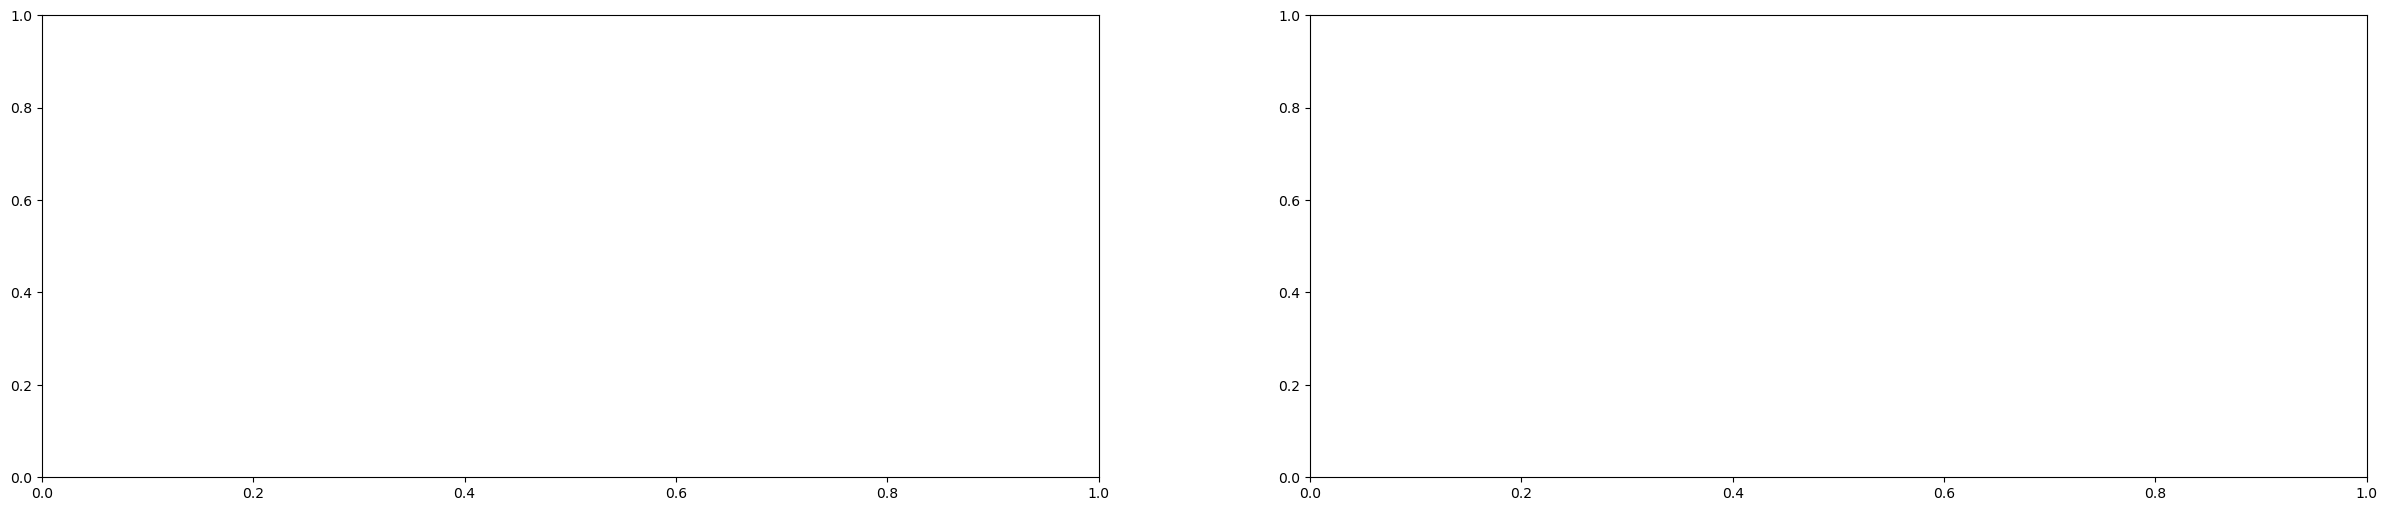

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6), sharex=True)

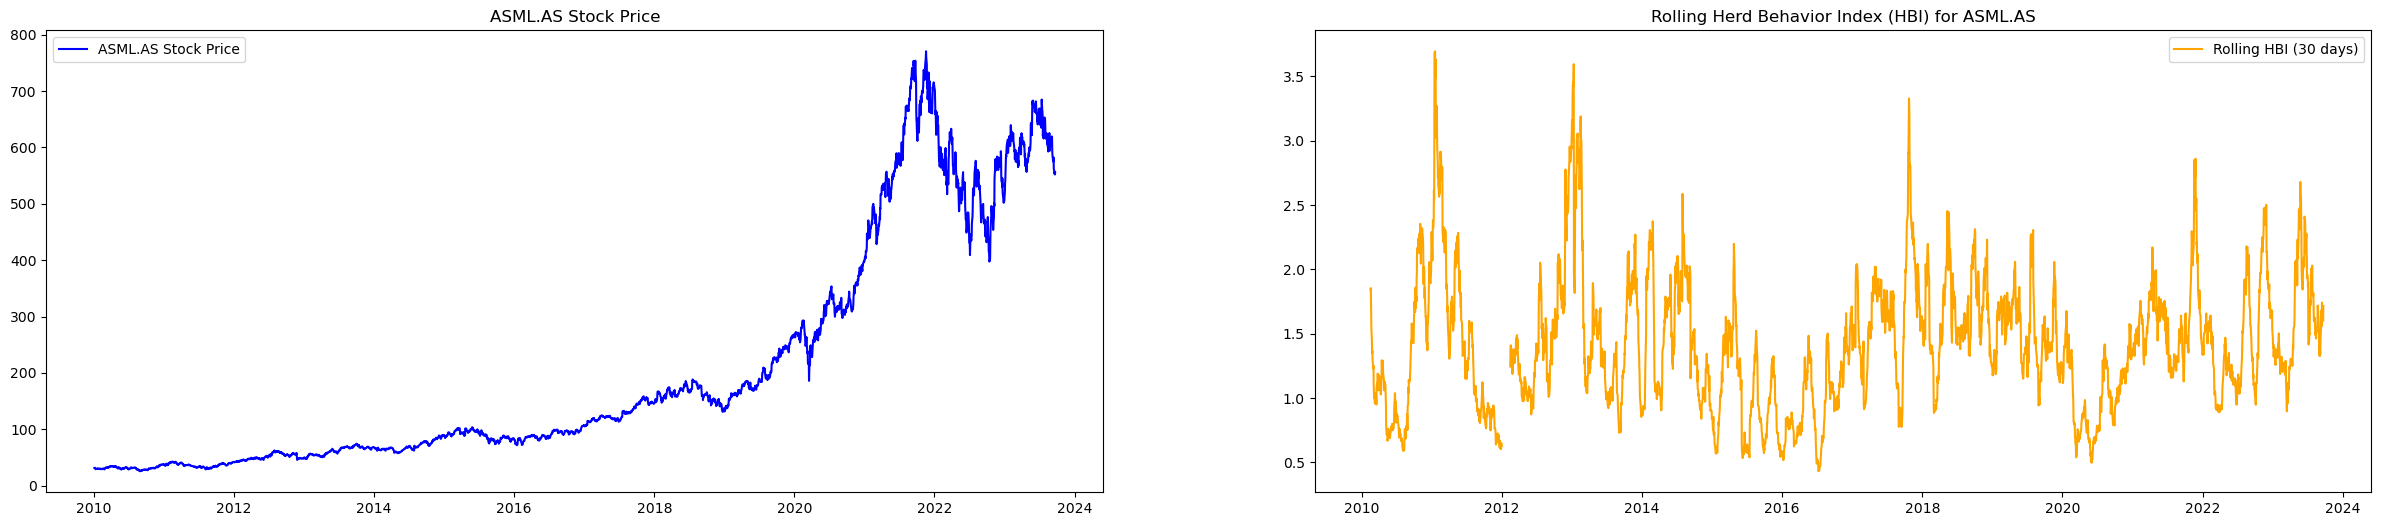

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6), sharex=True)

ax1.plot(asml['Close'], label='ASML.AS Stock Price', color='blue')
ax1.set_title('ASML.AS Stock Price')
ax1.legend()

ax2.plot(rolling_hbi, label='Rolling HBI (30 days)', color='orange')
ax2.set_title('Rolling Herd Behavior Index (HBI) for ASML.AS')
ax2.legend()


In [71]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [72]:
# CSAD Implementation: (Cross-Sectional Absolute Deviation)
# CSAD examines the dispersion of returns across a portfolio of stocks

# During periods of herding, returns of individual stocks tend to converge
# towards the market return, reulting in a low CSAD value

# During periods of non-herding, the returns are more dispered, leading
# to a higher CSAD value

tickers = ["AAPL", "AMZN", "GOOGL", "MSFT", "META", "NVDA", "NFLX", "ADBE", "CRM", 
           "INTC", "AVGO", "QCOM", "TXN", "CSCO", "ORCL", "^GSPC"]

In [73]:
data = yf.download(tickers, start='2000-01-01', end='2023-12-29')['Close']

[*********************100%%**********************]  16 of 16 completed


In [74]:
returns = data.pct_change().dropna()


In [75]:
window_size = 30


In [76]:
def rolling_csad(stock_returns, market_returns, window):
    csad_values = []
    for i in range(len(stock_returns) - window + 1):
        window_data = stock_returns.iloc[i:i+window]
        window_market = market_returns[i:i+window].mean()
        N = len(window_data.columns)
        csad = (N / (N - 1)) * np.sum(np.abs(window_data.sub(window_market, axis=0)).mean(axis=1))
        csad_values.append(csad)
    return pd.Series(csad_values, index=stock_returns.index[window-1:])

In [77]:
rolling_csad_values = rolling_csad(returns[tickers[:-1]], returns["^GSPC"], window_size)

In [78]:
aligned_data = data.loc[rolling_csad_values.index]

In [79]:
aligned_data_zeroed = aligned_data.sub(aligned_data.iloc[0])

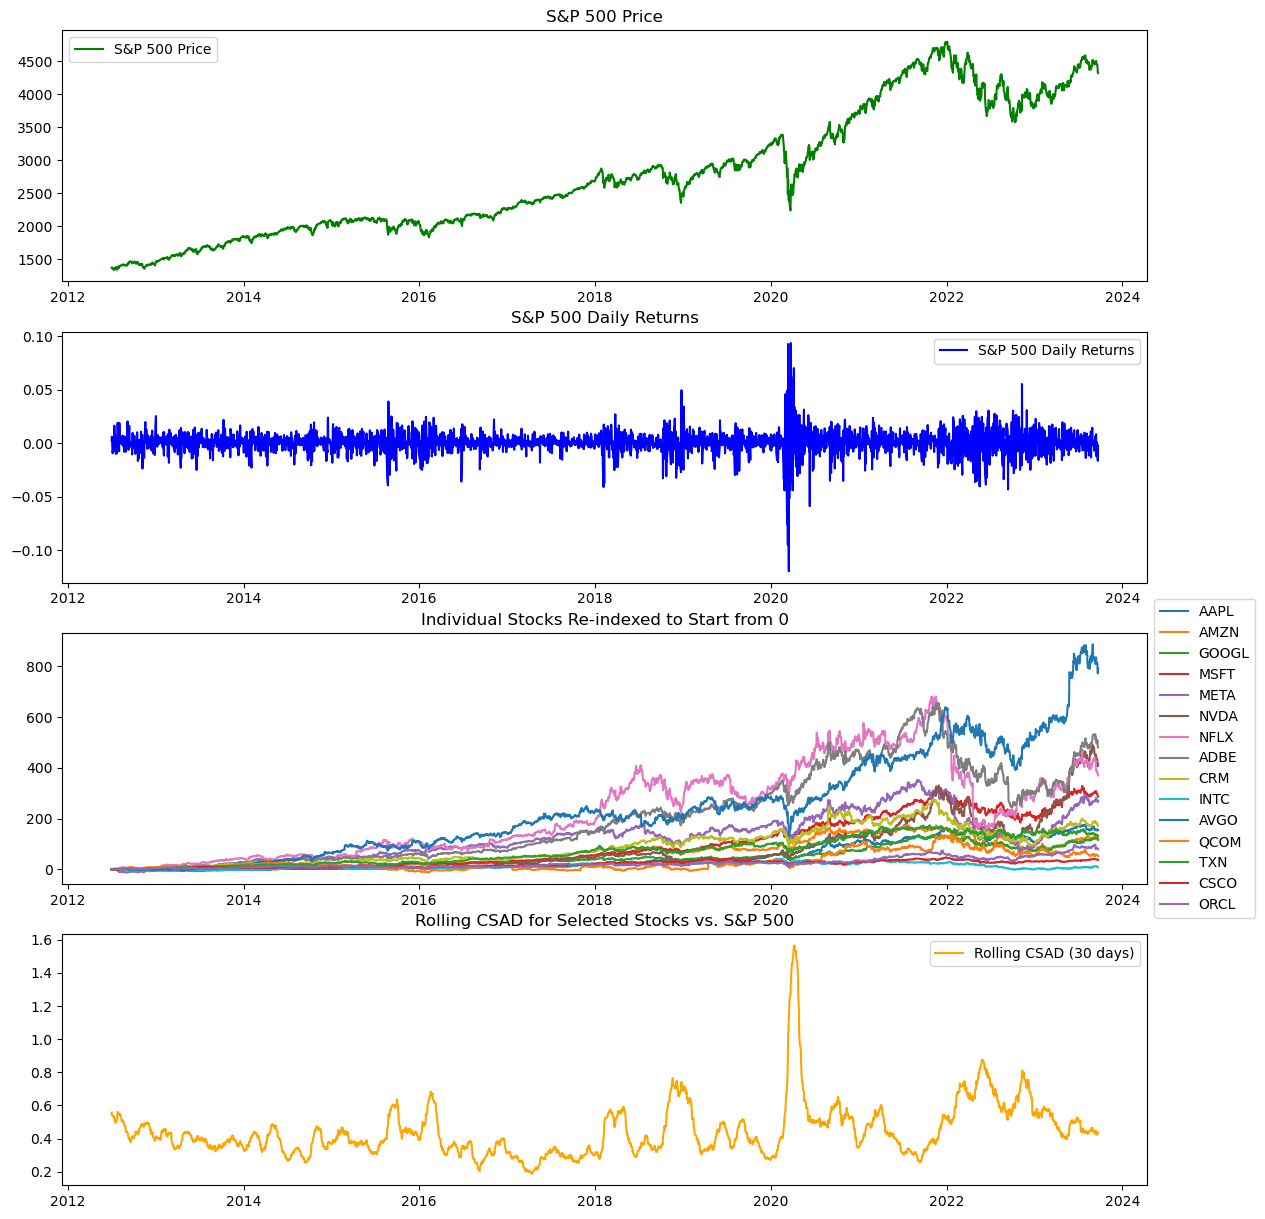

In [80]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 15))

ax1.plot(aligned_data["^GSPC"], label='S&P 500 Price', color='green')
ax1.set_title('S&P 500 Price')
ax1.legend()

ax2.plot(returns.loc[rolling_csad_values.index, "^GSPC"], label='S&P 500 Daily Returns', color='blue')
ax2.set_title('S&P 500 Daily Returns')
ax2.legend()

for ticker in tickers[:-1]: # we exclude ^GSPC
    ax3.plot(aligned_data_zeroed[ticker], label=ticker)
ax3.set_title('Individual Stocks Re-indexed to Start from 0')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4.plot(rolling_csad_values, label='Rolling CSAD (30 days)', color='orange')
ax4.set_title('Rolling CSAD for Selected Stocks vs. S&P 500')
ax4.legend()


In [81]:
# By comparing CSAD values with significant market events or news
# one can glean insights into the market's reactions and the presence
# or absence of herding behaviors

# Deviation in 2020 can be understood in the context of COVID-19, as
# tech companies were much more resilient to the changes in the
# stock market, as opposed to the other stocks listed in the S&P 500



In [82]:
# 3. Rolling Quantile Regression:
# When combined with rolling window approach, it allows for the dynamic 
# observation of these relationships over time, which can be particularly
# informative for understanding how asset relationships evolve,
# especially during market extremes. 

# Quantile regression models the relationship between a set of predictor (independent)
# variables and specific percentiles (or "quantities") of a target (dependent)
# variable, most often the median 

# Advantages over Least Squares Regression:
# (1) Quantile regression makes no assumptions about the distribution of the
# target variable
# (2) Quantile regression tends to resist the influence of outlying 
# observations

# Quantile regression widely used for researching in industries such
# as ecology, healthcare, and financial economics

# For instance:
# At the 10th quantile, we observe how the market influences the stock
# during its worth 10% of return days

# At the 50th quantile, the model examines the median relationship

# At the 90th quantile, the focus is on the best 10% of return days 


In [83]:
import statsmodels.formula.api as smf

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
tickers_1 = ["AAPL", "^GSPC"]
data_1 = yf.download(tickers_1, start = '2010-01-01', end='2023-12-29')['Close']


[*********************100%%**********************]  2 of 2 completed


In [94]:
returns_1 = data_1.pct_change().dropna()

In [95]:
df = returns_1.copy()

In [96]:
df.columns=['AAPL', 'SP500']
quantiles = [0.1, 0.5, 0.9]
window_1 = 252

rolling_params = {quantile: {"Intercept": [], "SP500": []} for quantile in quantiles}

In [98]:
for start in range(0, len(df) - window_1):
    window_1_data = df.iloc[start:start + window_1]
    for quantile in quantiles:
        mod = smf.quantreg('AAPL ~ SP500', window_1_data)
        res = mod.fit(q=quantile)
        rolling_params[quantile]["Intercept"].append(res.params["Intercept"])
        rolling_params[quantile]["SP500"].append(res.params["SP500"])


In [99]:
rolling_index= df.index[window_1 - 1:-1]

In [100]:
rolling_dfs = {quantile: pd.DataFrame(data_1, index=rolling_index) for quantile, data_1 in rolling_params.items()}

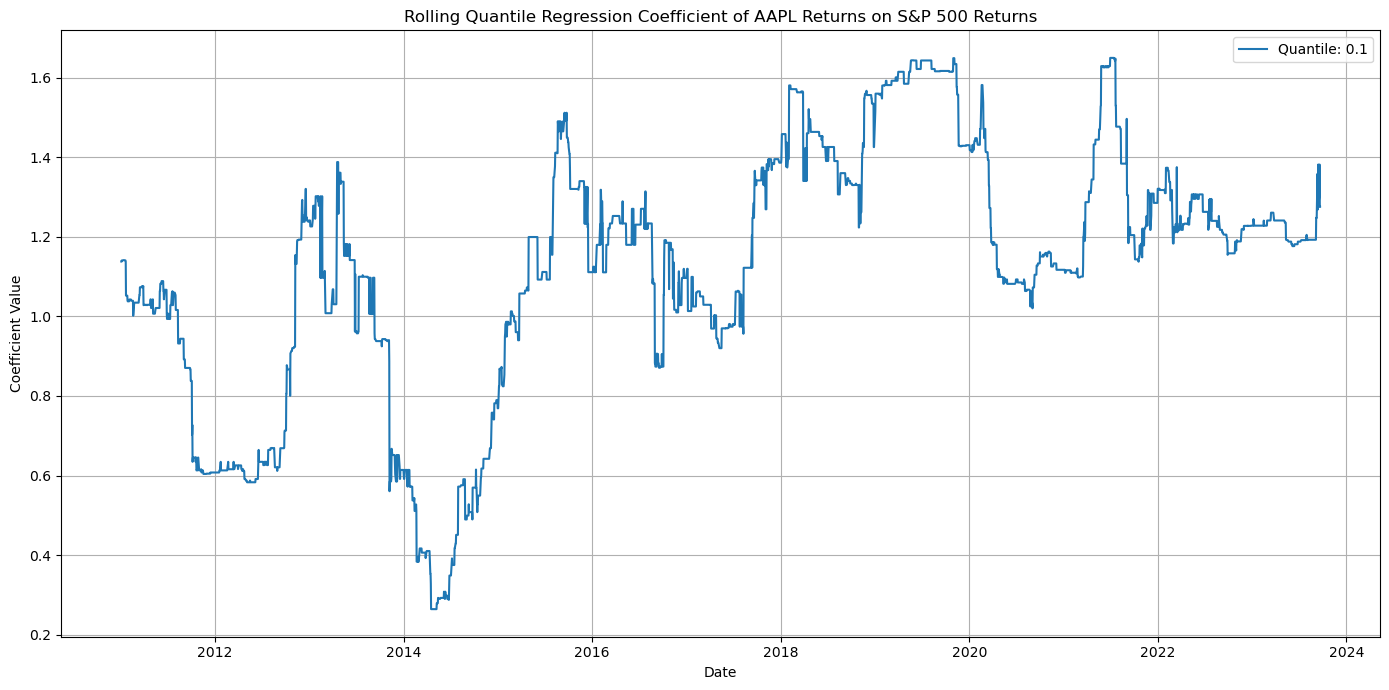

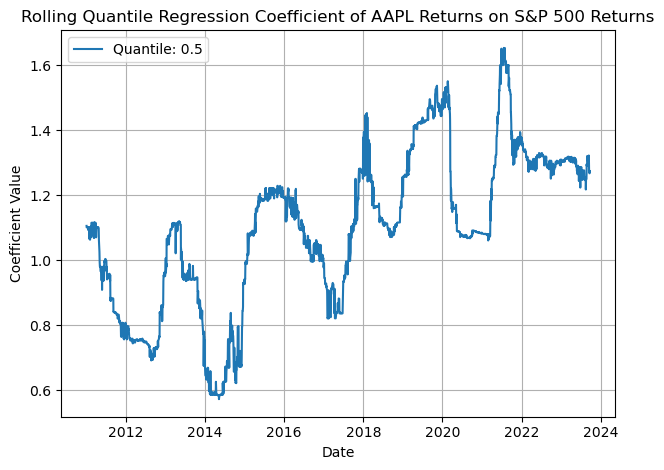

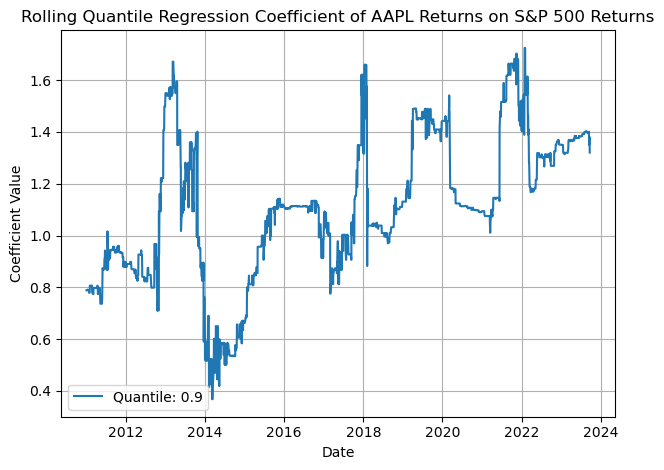

In [104]:
plt.figure(figsize=(14,7))
for quantile in quantiles:
    plt.plot(rolling_dfs[quantile]["SP500"], label=f'Quantile: {quantile}')
    plt.title('Rolling Quantile Regression Coefficient of AAPL Returns on S&P 500 Returns')
    plt.xlabel('Date')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [106]:
# Implications: 

# Herding can lead to pronounced market effects. Persistance patterns
# of herding could result in asset bubbles as investors move en masse towards
# particular stocks or sectors.

# When these bubbles burst, significant market corrections or crashes
# can ensue. Conversely, a consistent absence of herding may be 
# indicative of a more rational market, where decisions are primarily 
# driven by asset fundamentals rather than investor sentiment.

# By oberserving how assets correlate or behave in extreme market scenarios
# one can infer the collective psyche of the market participants.
# For instance, a densely connected network in stock correlations
# might indicate a sentiment-driven market where investors 
# are moving together, possibly ignoring underlying asset fundamentals.

# On the other hand, differentiated decisions across assets could mean
# investors are taking a more individualistic, fundamentals-driven
# approach. 

# Understanding herding during extreme market conditions (eg. quantile behaviors)
# provides insights into how assets might react during black swan events.

# It helps stakeholders anticipate potential market reactions in outlier
# scenarios.

In [110]:
# Limitations:

# High correlations or similar patterns across stocks don't always indicate
# herding. They would be due to sector-specific news, geopolitical events,
# or other macroecnomic factors influencing assets similarly.

# Misrepresenting these as herding can lead to flawed strategies or policies.

# While analyzing historical data provides insights into past behaviors,
# it's essential to remember that past performance doesn't guarantee
# future behavior.

# Markets evolve, and newer factors or events can introduce behaviors
# previously unseen.

# Some methods might rely on static thresholds or parameters; such
# rigidity can be problematic in dynamic markets where adaptability is crucial
# for accurate analysis

# External events like geopolitical shifts, regulatory changes, or global
# crises can heavily influence asset behaviors. These methods might not
# always account for such exogenous factors, potentially skewing
# interpretations of herding.